In [1]:
import sys
sys.path.append("..")

In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 

In [3]:
from recipes.decision_tree import DecisionTreeClassifier
from recipes.random_forest import RandomForestClassifier
from recipes.cross_validation import cross_validate

In [4]:
breast_cancer = fetch_ucirepo(id=14) 

In [5]:
X = breast_cancer.data.features 
y = breast_cancer.data.targets   

In [6]:
X

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...
281,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,40-49,ge40,30-34,5-Mar,no,3,left,left_low,no


In [7]:
y

,Class
0,no-recurrence-events
1,no-recurrence-events
2,no-recurrence-events
3,no-recurrence-events
4,no-recurrence-events
...,...
281,recurrence-events
282,recurrence-events
283,recurrence-events
284,recurrence-events


In [8]:
df = pd.concat([X, y], axis=1)
df

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events
...,...,...,...,...,...,...,...,...,...,...
281,30-39,premeno,30-34,0-2,no,2,left,left_up,no,recurrence-events
282,30-39,premeno,20-24,0-2,no,3,left,left_up,yes,recurrence-events
283,60-69,ge40,20-24,0-2,no,1,right,left_up,no,recurrence-events
284,40-49,ge40,30-34,5-Mar,no,3,left,left_low,no,recurrence-events


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     286 non-null    object
 9   Class        286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [10]:
df.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [11]:
df = df.dropna(axis=0)
df

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events
...,...,...,...,...,...,...,...,...,...,...
281,30-39,premeno,30-34,0-2,no,2,left,left_up,no,recurrence-events
282,30-39,premeno,20-24,0-2,no,3,left,left_up,yes,recurrence-events
283,60-69,ge40,20-24,0-2,no,1,right,left_up,no,recurrence-events
284,40-49,ge40,30-34,5-Mar,no,3,left,left_low,no,recurrence-events


In [12]:
X = df.loc[:, df.columns != 'Class']
y = df['Class']

In [13]:
classifier = DecisionTreeClassifier()

In [14]:
cross_validate(X, y, classifier, 5)

([0.7090909090909091,
  0.6,
  0.7090909090909091,
  0.6363636363636364,
  0.6909090909090909],
 0.6690909090909091)

In [15]:
results = pd.DataFrame(columns=['depth', 'k', 'score'])
for depth in [2, 3, 5, 7, 10, 20]:
    for k in [2, 5, 8, 12, 15, 20, 30, 50]:
        classifier = DecisionTreeClassifier(k=k, max_depth=depth)
        results.loc[len(results.index)] = [depth, k, cross_validate(X, y, classifier, 10)[1]]

In [16]:
results

,depth,k,score
0,2.0,2.0,0.640741
1,2.0,5.0,0.607407
2,2.0,8.0,0.625926
3,2.0,12.0,0.622222
4,2.0,15.0,0.648148
5,2.0,20.0,0.648148
6,2.0,30.0,0.633333
7,2.0,50.0,0.688889
8,3.0,2.0,0.603704
9,3.0,5.0,0.655556


<Axes: xlabel='depth', ylabel='score'>

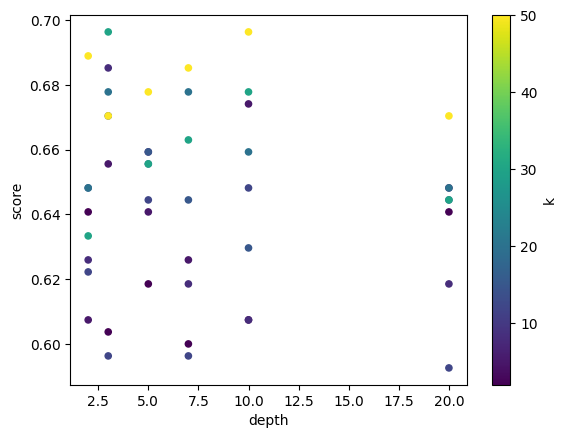

In [17]:
results.plot.scatter(
    x='depth',
    y='score',
    c='k'
)

In [18]:
classifier = RandomForestClassifier(num_trees=50)

In [19]:
cross_validate(X, y, classifier, 10)

([0.5925925925925926,
  0.7777777777777778,
  1.0,
  0.8888888888888888,
  1.0,
  0.9259259259259259,
  0.9629629629629629,
  1.0,
  0.9629629629629629,
  0.9629629629629629],
 0.9074074074074074)